# Cast columns to proper types

In [276]:
# import library
import pandas as pd

data = pd.read_csv("data/heart.csv")

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Insepect each column individually and see there values

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [278]:
for col in data.columns:
    print(data[col].value_counts())

54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64
M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64
0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64
0    704
1    214
Name: FastingBS, dtype: int64
Normal    552
LVH       188
S

In [279]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

AGE: 
* the dtype seems correct which is int64. 
* The ages dont seem ridiculous so it seems fine.

SEX:
* The dtype is in string format. 
* Need to cast the Males to 1 and Females to 0 to make it a binary category

ChestPainType: 
* The dtype is an object which suggests that the pain types are string 
* Create a mapping for the pain types and encode them since its a categorical column.
* If there ranked we need to respect that ranking 

RestingBP:
* The dtype is int64 which indicates its as expected. 
* This column is in mmHg which is not the same scale as the other numeric columns so it needs to be normalized
* There seems to be 1 value that is 0 mmHg which would indicate that the person would be dead so this must be a mistake. 
    * Drop that row.

Cholesterol:
* The dtype is int64 which indicates its as expected. 
* This column is in mm/dL which is not the same scale as the other numeric columns so it needs to be normalized
* It seems that we have concentrations as zero 172 times. Thats about 10 percent of the entire dataset. 
    * Even healthy people have some level of cholesterol so we should impute this value with the median so we can conserve those rows.

FastingBS:
* The dtpe is int64 which indicates its as expected as it is a binary category

RestingECG:
* Has three categories in string format. Which matched the dtype object. 
* Cast this column to numeric values. 
* This numeric values do not have to be ranked. 

MaxHR:
* Its as expeted which is a dtype of integer. Its simply the max heart rate acheived. 
* We need to normalize this column 

ExerciseAngina:
* Has a dtype of object which suggests its categorical which it is. 
* It should be binary 
    * We need to cast N = 0 (No), Y = 1 (Yes)

OldPeak: 
* The old peak is a cardiac stress test from the S to T wave. It represents the magnitude of ST segment depression during a cardiac stress test. This is also known as the 'depression' or 'depolarization' phase on the ECG waveform. Changes in the ST segment can indicate various cardiac conditions.
* It makes sense that the dtype = float. 
* We need to normalize this column

ST_Slope:
* Has the object dtype and has three categories. 
* Its a continuation of the OldPeak column except this time it simply labels it as Flat, Up, Down

HeartDisease: (Target)
* Its binary and integer based as expected

Lets begin by label encoding the following columns: 
* Sex
* ChestPainType
* ExcerciseAngina
* ST_Slope


In [280]:
"""
We have two binary columns that can be encoded using LabelEncoder. Those columns would be Sex and ExcerciseAngina
"""

# import label encoder
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# Perform the numeric encoding
data['Sex'] = le.fit_transform(data['Sex'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])

In [281]:
data['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

In [282]:
data['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

Next we need to encode the nominal column for Chest Pain type

In [283]:
# Define an ordinal mapping dictionary for chest pain
chest_mapping = {'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3}
# Define an ordinal mapping dictionary for Slope
slope_mapping = {'Flat': 0, 'Down': 1, 'Up': 2}
# Define an ordinal mapping dictionary for ECG 
ecg_mapping = {'Normal': 0, 'ST': 1, 'LVH': 2}
# Apply ordinal encoding to the columns
data['ChestPainType'] = data['ChestPainType'].map(chest_mapping)
data['ST_Slope'] = data['ST_Slope'].map(slope_mapping)
data['RestingECG'] = data['RestingECG'].map(ecg_mapping)

In [284]:
data['ChestPainType'].value_counts()

0    496
1    203
2    173
3     46
Name: ChestPainType, dtype: int64

In [285]:
data['ST_Slope'].value_counts()

0    460
2    395
1     63
Name: ST_Slope, dtype: int64

In [286]:
data['RestingECG'].value_counts()

0    552
2    188
1    178
Name: RestingECG, dtype: int64

# Clean numeric columns 

Determine any outliers in our numeric columns

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(data, numeric_columns):
    # Determine the number of rows and columns in the subplot grid
    num_rows = (len(numeric_columns) + 1) // 2  # Calculate the number of rows (round up)
    num_cols = 2  # Fixed number of columns

    # Create the subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Flatten the axes array to handle varying numbers of subplots
    axes = axes.ravel()

    # Develop Boxplots to see outliers
    for idx, col in enumerate(numeric_columns):
        ax = axes[idx]
        sns.boxplot(x=col, data=data, palette='pastel', ax=ax)
        ax.set_ylabel('')
        ax.spines['top'].set_visible(False)
        ax.set_xlabel('')
        ax.spines['right'].set_visible(False)
        ax.set_title(
            f'{col}',
            loc='right',
            weight='bold',
            fontsize=12
        )

    # Hide any unused subplots
    for i in range(len(numeric_columns), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

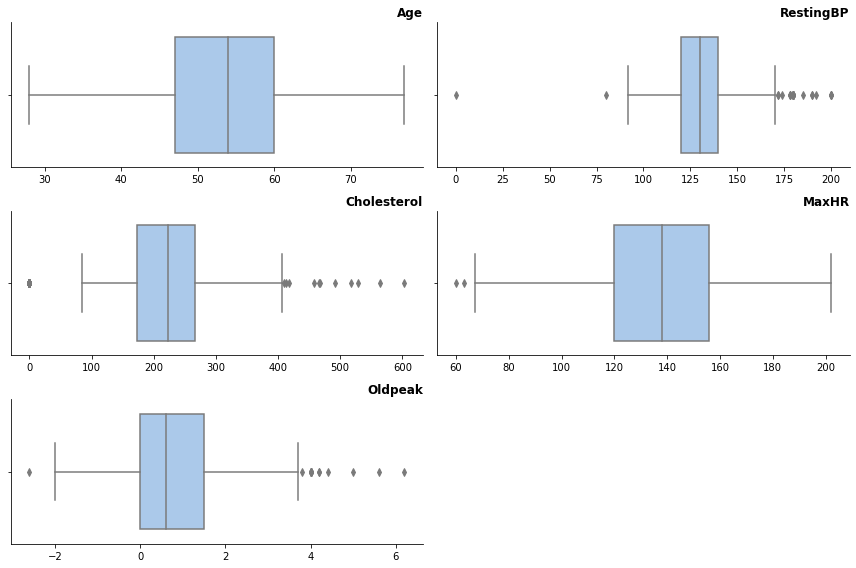

In [288]:
# subset our numeric data
num = 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'

plot_boxplots(data, num)

The main consideration in removing outliers, is if any of the values here are possible to obtain, and if they are then we should consider keeping them. It would refelect actual real results. If this for some reason is a problem then after modeling we can consider removing the outliers

Age: 
* As long as we are under 100 or close to it then its fine. 
* This proves to be true so we keep all ages

Resting BP: 
* There are outliers however we need to consider the patients themselves. Some people can acheive very low BP since there atheletes. Its possible to have low resting BP because of [Hypotension](https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465). 
    * Anything below 90 mmHg is consider Hypotension. So this means that 78 mmHg is considered possible. 
    * There is one value that is zero which doesn't make sense so lets drop this row

Cholesterol: 
* The [ranges](https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601) for cholesterol suggest that the only impossible level is the 0 mg/dL value.
* Drop that row

MaxHR: 
* Should keep all of it. All the listed Heart Rates are possible

Old Peak:
* All values are possible


In [289]:
import numpy as np
# Replace all zeros in RestingBP with NaN
data['RestingBP'] = data['RestingBP'].replace(0, np.nan)
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)

# Drop that NaN value row wise
data['RestingBP'].dropna(axis=0, inplace=True)
data['Cholesterol'].dropna(axis=0, inplace=True)

In [290]:
data['RestingBP'].value_counts()

120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
98.0       1
113.0      1
96.0       1
80.0       1
129.0      1
Name: RestingBP, Length: 66, dtype: int64

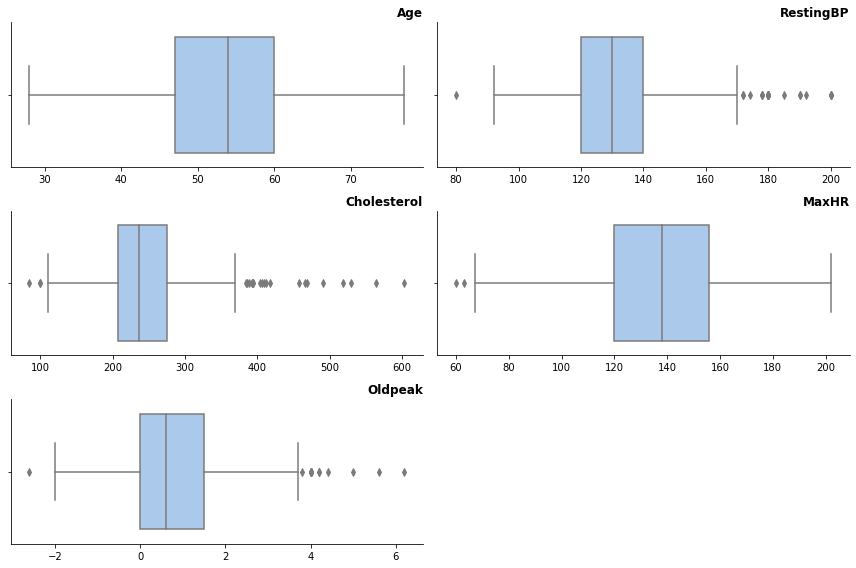

In [291]:
plot_boxplots(data, num)

In [292]:
data.shape

(918, 12)

# Explore

Lets view a heatmap of the numeric columns and the target

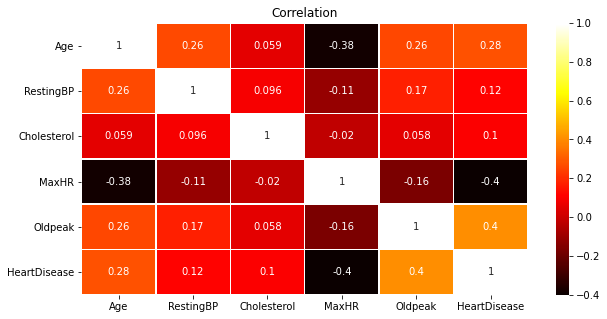

In [293]:
def correlation_heatmap(df: pd.core.frame.DataFrame, subset: list, target: str, title_name: str='Correlation'):
    # Include the target variable in the list of columns to display in the heatmap
    subset.append(target)
    # Subset the DataFrame to include only the selected columns
    subset_df = df[subset]
    corr = subset_df.corr()
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, linewidths=.5, cmap='hot', annot=True)
    plt.title(title_name)
    plt.show()

numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
correlation_heatmap(data, numeric, 'HeartDisease', 'Correlation')

We can see how Old Peak has the most correlation with Heart Disease. Max HR has the highest negative correlation. The other columns are not that high 

Lets look at the distribution of the features and target

In [294]:
def plot_column_distributions(df: pd.DataFrame):
    # Set the number of columns per row in the subplots
    columns_per_row = 3

    # Calculate the number of rows needed for subplots
    num_rows = (len(df.columns) + columns_per_row - 1) // columns_per_row

    # Create subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))
    axes = axes.ravel()

    for i, column in enumerate(df.columns):
        # Plot the histogram for each numeric column
        sns.histplot(data=df, x=column, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    # Remove any empty subplots
    for j in range(len(df.columns), num_rows * columns_per_row):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

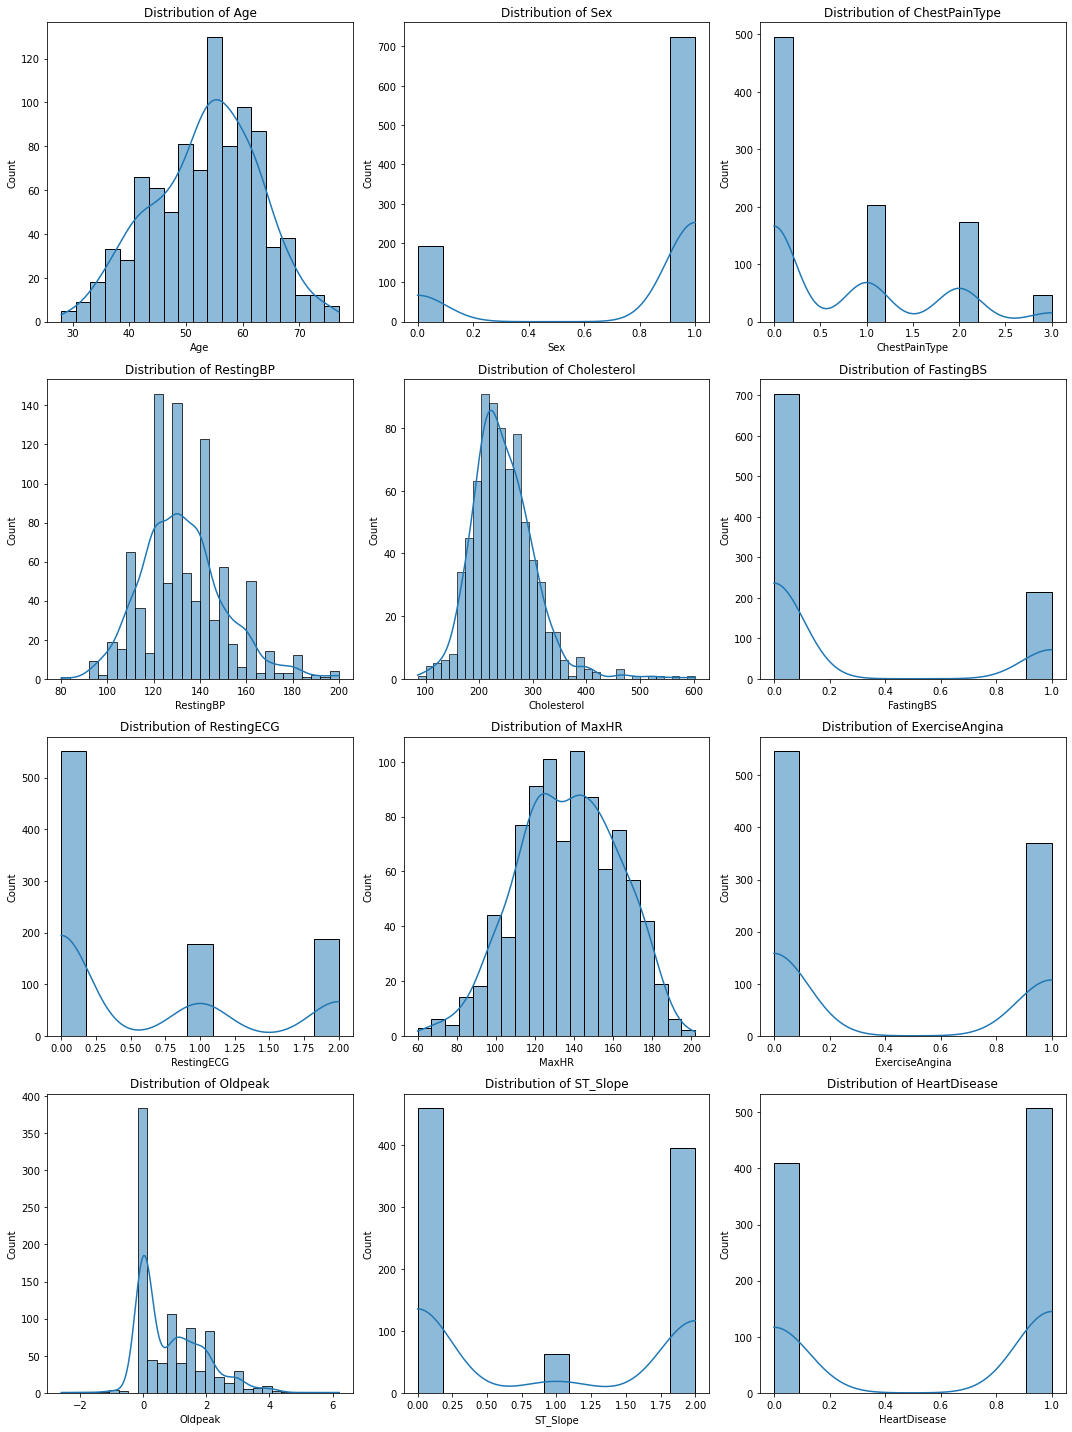

In [295]:
plot_column_distributions(data)

On the bright side our Target is balanced. Its almost 50-50. As mentioned before the numeric columns need to scaled. This should be perfomed after train test split to avoid data leakage. 

Lastly we need to address the outliers in the numeric columns if possible. Ideally with my domain knowledge we should not sacrfice many rows because all of these are possible values even though they are outliers. 

Lets see the tradeoff between removals

Z-Score method

In [296]:
from scipy import stats

# Create a copy of the original DataFrame
data_z = data.copy()

# subset our numeric data
numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop through each numeric column and identify rows with outliers based on z-scores
for col in numeric:
    # Calculate z-scores for the current column
    z_scores = np.abs(stats.zscore(data_z[col]))
    
    # Identify outlier indices for the current column based on z-scores
    outlier_indices = np.where((z_scores>3))[0]
    # Drop outliers from DataFrame for the current column
    data_z.drop(data_z.index[outlier_indices], inplace=True)

# Reset the index of the cleaned DataFrame
data_z.reset_index(drop=True, inplace=True)

<ipython-input-296-ceb6250276ac>:15: RuntimeWarning: invalid value encountered in greater
  outlier_indices = np.where((z_scores>3))[0]


In [297]:
data.shape

(918, 12)

In [298]:
data_z.shape

(910, 12)

In [299]:
data_z.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       170
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [300]:
data_z.dropna(axis=0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140.0,289.0,0,0,172,0,0.0,2,0
1,49,0,1,160.0,180.0,0,0,156,0,1.0,0,1
2,37,1,2,130.0,283.0,0,1,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,0,108,1,1.5,0,1
4,54,1,1,150.0,195.0,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
905,45,1,3,110.0,264.0,0,0,132,0,1.2,0,1
906,68,1,0,144.0,193.0,1,0,141,0,3.4,0,1
907,57,1,0,130.0,131.0,0,0,115,1,1.2,0,1
908,57,0,2,130.0,236.0,0,2,174,0,0.0,0,1


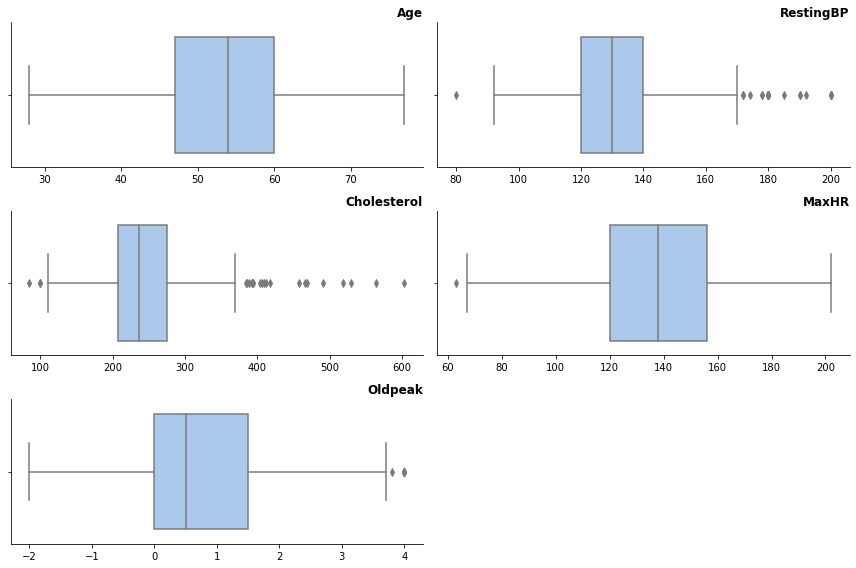

In [301]:
plot_boxplots(data_z, numeric)

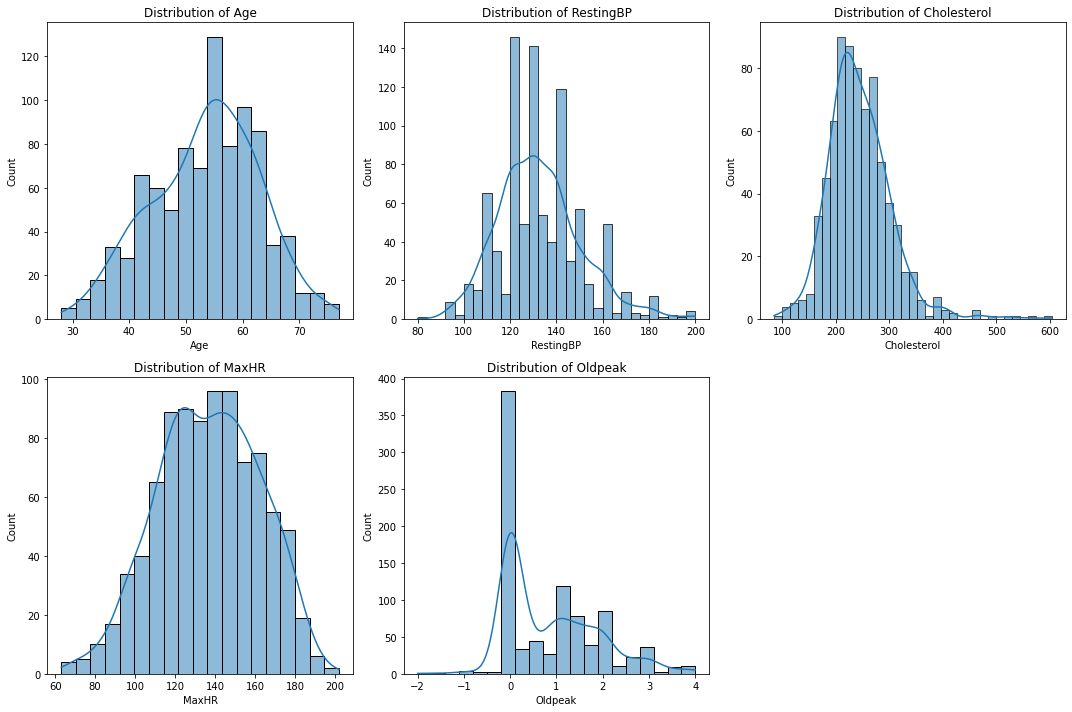

In [302]:
plot_column_distributions(data_z[numeric])

In [303]:
# Create a copy of the original DataFrame
data_IQR = data.copy()

# Loop through each score column and remove outliers
for col in numeric:
    # Calculate Quartiles and IQR for the current column
    Q1 = data_IQR[col].quantile(0.25)
    Q3 = data_IQR[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier indices for the current column
    outlier_indices = data_IQR[(data_IQR[col] < lower_bound) | (data_IQR[col] > upper_bound)].index

    # Drop rows with outliers for the current column from the cleaned DataFrame
    data_IQR.drop(outlier_indices, inplace=True)

# Reset the index of the cleaned DataFrame
data_IQR.reset_index(drop=True, inplace=True)

In [304]:
data.shape

(918, 12)

In [305]:
data_IQR.shape

(854, 12)

In [306]:
data_IQR.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       162
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

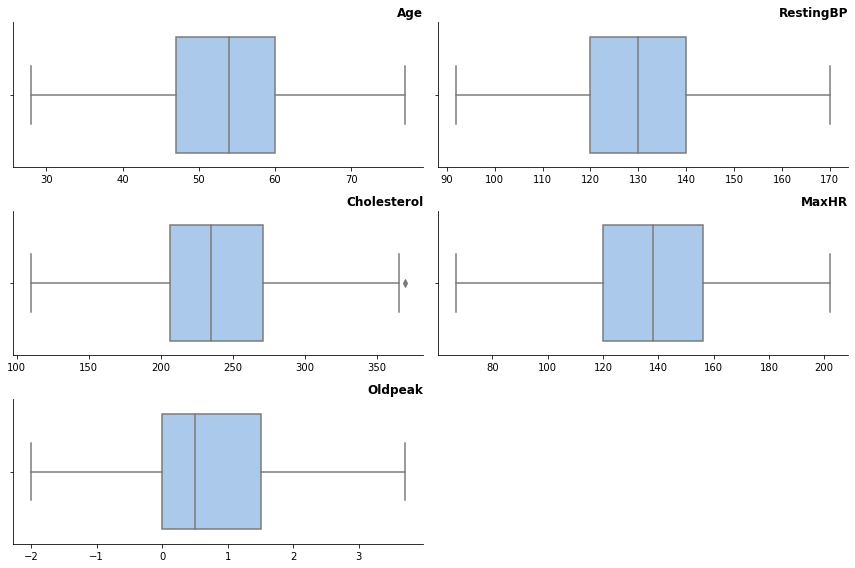

In [307]:
plot_boxplots(data_IQR, numeric)

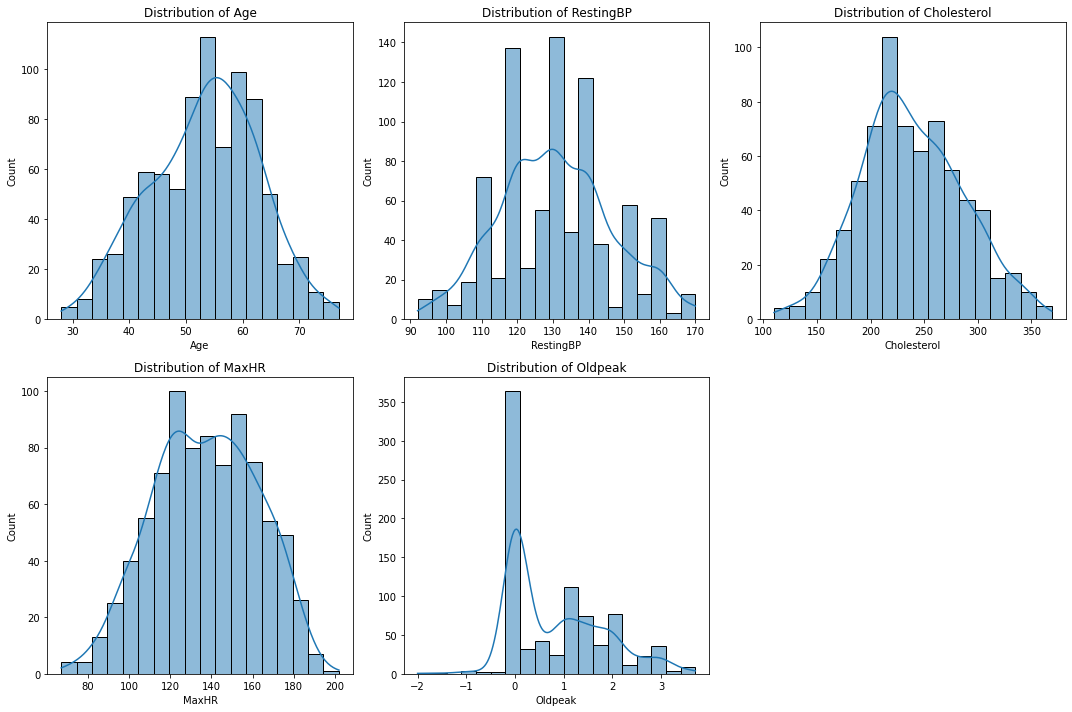

In [308]:
plot_column_distributions(data_IQR[numeric])

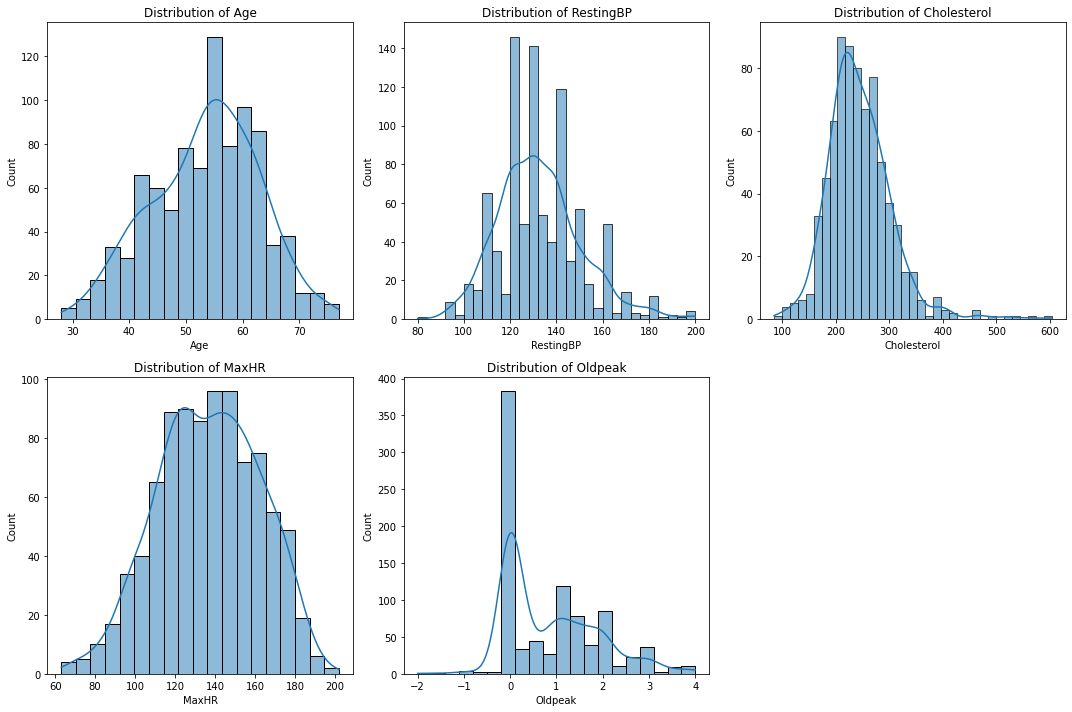

In [309]:
plot_column_distributions(data_z[numeric])

Similar result overall. Using the IQR sacrifices more rows however its model performance might be much better in comparison to the z-score data. The main issue here is the removal of cholesterial data. I the IQR method doesn't have data for 500 and above. That is still possible according to the ranges for cholesterol. Instead it is probably more appropriate to use z-score method but use 2 std devations away. 

In [310]:
from scipy import stats

# Create a copy of the original DataFrame
data_z_2 = data.copy()

# subset our numeric data
numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop through each numeric column and identify rows with outliers based on z-scores
for col in numeric:
    # Calculate z-scores for the current column
    z_scores = np.abs(stats.zscore(data_z[col]))
    
    # Identify outlier indices for the current column based on z-scores
    outlier_indices = np.where((z_scores>2))[0]
    # Drop outliers from DataFrame for the current column
    data_z.drop(data_z.index[outlier_indices], inplace=True)

# Reset the index of the cleaned DataFrame
data_z.reset_index(drop=True, inplace=True)

<ipython-input-310-75c3c13c5e1b>:15: RuntimeWarning: invalid value encountered in greater
  outlier_indices = np.where((z_scores>2))[0]


In [311]:
data_z_2.shape

(918, 12)

In [312]:
data_z_2.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [313]:
data_z_2.dropna(axis=0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140.0,289.0,0,0,172,0,0.0,2,0
1,49,0,1,160.0,180.0,0,0,156,0,1.0,0,1
2,37,1,2,130.0,283.0,0,1,98,0,0.0,2,0
3,48,0,0,138.0,214.0,0,0,108,1,1.5,0,1
4,54,1,1,150.0,195.0,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110.0,264.0,0,0,132,0,1.2,0,1
914,68,1,0,144.0,193.0,1,0,141,0,3.4,0,1
915,57,1,0,130.0,131.0,0,0,115,1,1.2,0,1
916,57,0,2,130.0,236.0,0,2,174,0,0.0,0,1


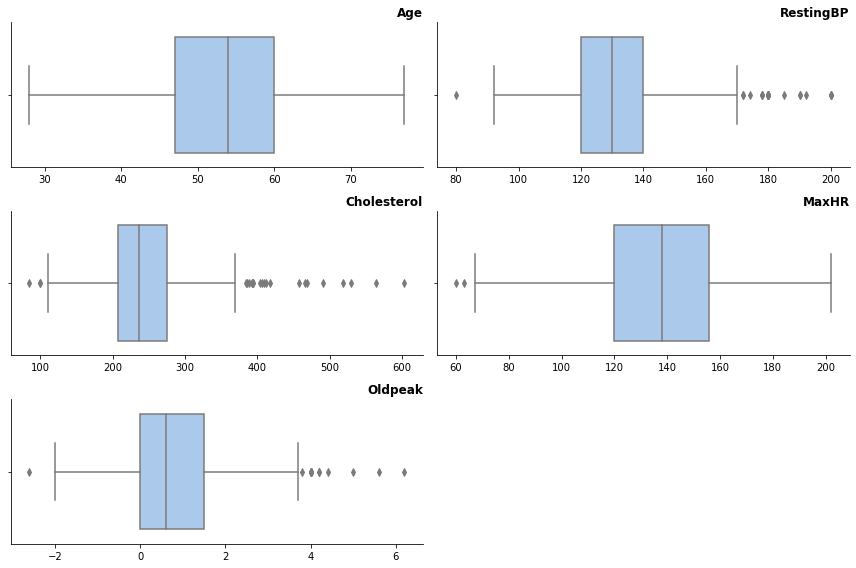

In [314]:
plot_boxplots(data_z_2, numeric)

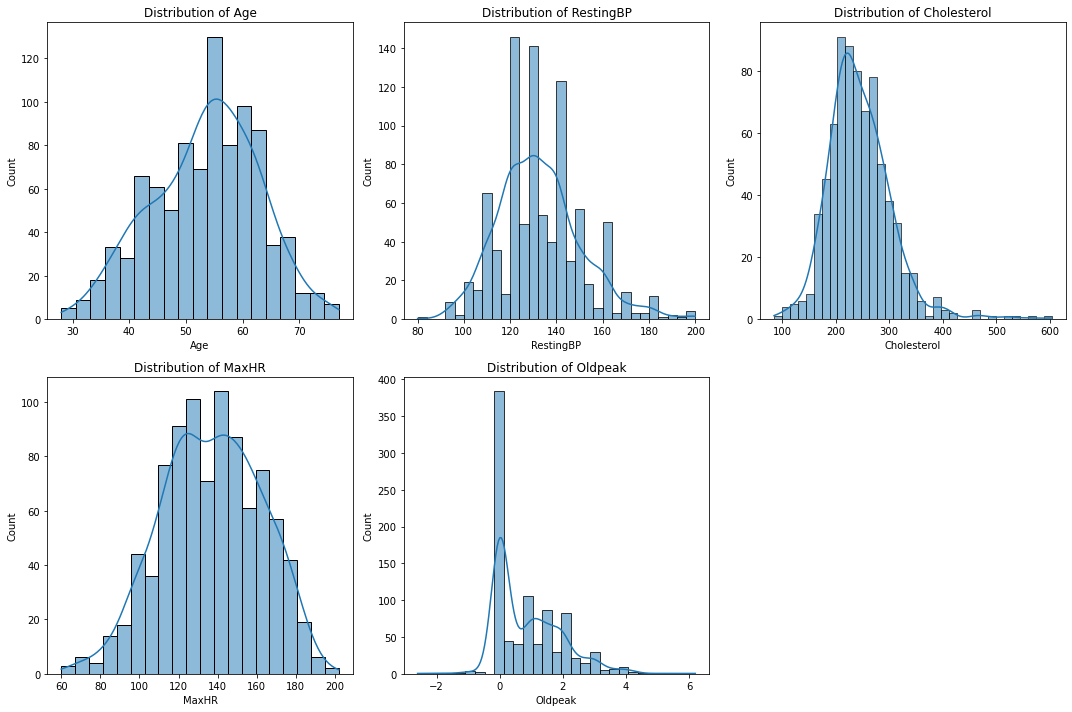

In [315]:
plot_column_distributions(data_z_2[numeric])

# Begin Modeling 

The overall process: 
1. Feature Engineer
    a. Scaling the numeric features on the training set after train test split to avoid data leakage.
2. Creata a Baseline Pipeline that will include the following types of models
    * LogisticClassifier()
    * RandomForest()
    * KNeighborsClassifier()
    * GradientBoostingClassifier()
    * XGBClassifier()
3. Evaluate the baselilne model performances
4. Creata a Optimization Pipeline with GridSearch CV
5. Evaluate the optimized model performances

## Feature Engineering

1. Split data into training and testing
2. Normalize the training data 
3. No need to One Hot Encode since we label encoded all the data already

In [94]:
# Import relevant libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, log_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Because we have extreme values MinMax Scaler might perform better. Lets see which would sacrifice less data

In [98]:
from sklearn.impute import SimpleImputer

# Define our Features and Target
X = data_z_2.drop(columns="HeartDisease")
y = data_z_2["HeartDisease"]

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define our numeric columns that need to be scaled.
num = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Scale the numeric columns
# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the specified numeric columns in the training data
X_train_scaled = X_train.copy()
X_train_scaled.loc[:, num] = scaler.fit_transform(X_train[num])

# Transform the specified numeric columns in the test data using the same scaler
X_test_scaled = X_test.copy()
X_test_scaled.loc[:, num] = scaler.transform(X_test[num])

# Impute missing values in the scaled data
imputer = SimpleImputer(np.nan, strategy='mean')

# # Reset the index of X_train and X_test after imputation
# X_train_scaled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
# X_test_scaled = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# # Update y_train and y_test to match the filtered X_train and X_test
# y_train = y_train[X_train_scaled.index]
# y_test = y_test[X_test_scaled.index]


c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass missing_values=nan as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Without outlier removal, when we scale it we would lose about 130 rows which is much better than 200 rows. We keep the integrity of the data distribution.

Instead of dropping the rows with null values, we imputed the mean after normalization. 

In [99]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train shape: (688, 11)
X_test shape: (230, 11)
X_train columns: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')
X_test columns: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [702]:
# Create Pipelines
# Define the pipelines for each algorithm Baseline
logreg_pipeline = Pipeline([
    ('classifier', LogisticRegression())
])

rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

ada_pipeline = Pipeline([
    ('ada', AdaBoostClassifier())
])

gb_pipeline = Pipeline([
    ('gb', GradientBoostingClassifier())
])

xgb_pipeline = Pipeline([
    ('xgb', XGBClassifier())
])


# Fit and evaluate the each baseline pipeline
pipelines = [logreg_pipeline, rf_pipeline, knn_pipeline, ada_pipeline, gb_pipeline, xgb_pipeline]

# Fit and evaluate each pipeline
for pipeline in pipelines:
    print(f"Training {pipelines}...")
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    print(f"Evaluating {pipeline}...")
    
    # Make predictions using the training data
    predictions = pipeline.predict(X_test)

    # Evaluate the pipeline's performance
    loss = log_loss(y_test, 
                    predictions,
    )
    report = classification_report(
        y_test, 
        predictions, 
    )
    # print(f"Log Loss:{loss}")
    print("\n" + "=" * 40 + "\n")
    print(f"{pipeline} Classification Report:\n", report)
    print("\n" + "=" * 40 + "\n")

Training [Pipeline(steps=[('classifier', LogisticRegression())]), Pipeline(steps=[('classifier', RandomForestClassifier())]), Pipeline(steps=[('classifier', KNeighborsClassifier())]), Pipeline(steps=[('ada', AdaBoostClassifier())]), Pipeline(steps=[('gb', GradientBoostingClassifier())]), Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, reg

ValueError: X has 10 features per sample; expecting 9